In [158]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing import image

Preprocessing

In [159]:
mnist_dataset, mnist_info = tfds.load(name='mnist', with_info=True, as_supervised=True)

In [160]:
mnist_train, mnist_test  = mnist_dataset['train'], mnist_dataset['test']

num_validation_samples = 0.1 * mnist_info.splits['train'].num_examples
num_validation_samples = tf.cast(num_validation_samples, tf.int64)

num_test_samples = mnist_info.splits['test'].num_examples
num_test_samples = tf.cast(num_test_samples, tf.int64)

def scale(image, label):
    image = tf.cast(image, tf.float32)
    image /= 255.
    return image, label

scaled_train_and_validation_data = mnist_train.map(scale)

test_data = mnist_test.map(scale)

BUFFER_SIZE = 10000
shuffled_train_and_validation_data = scaled_train_and_validation_data.shuffle(BUFFER_SIZE)

validation_data = shuffled_train_and_validation_data.take(num_validation_samples)
train_data = shuffled_train_and_validation_data.skip(num_validation_samples)

BATCH_SIZE = 100

train_data = train_data.batch(BATCH_SIZE)
validation_data = validation_data.batch(num_validation_samples)
test_data = test_data.batch(num_test_samples)

validation_inputs, validation_targets = next(iter(validation_data))

Outline the Model

In [187]:
input_size = 784
output_size = 10
hidden_layer_size = 350

model = tf.keras.Sequential([
                            tf.keras.layers.Flatten(input_shape=(28,28,1)),
                            tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
                            tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
                            tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
                            tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
                            tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
                            tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
                            tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
                            tf.keras.layers.Dense(output_size, activation='softmax'),
                            ])

Optimizer and Loss Function

In [188]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Training

In [189]:
NUM_EPOCHS = 10

model.fit(train_data, epochs=NUM_EPOCHS, validation_data=(validation_inputs, validation_targets), verbose=2)


Epoch 1/10
540/540 - 9s - 17ms/step - accuracy: 0.9202 - loss: 0.2637 - val_accuracy: 0.9553 - val_loss: 0.1521
Epoch 2/10
540/540 - 5s - 10ms/step - accuracy: 0.9670 - loss: 0.1175 - val_accuracy: 0.9585 - val_loss: 0.1508
Epoch 3/10
540/540 - 5s - 9ms/step - accuracy: 0.9756 - loss: 0.0865 - val_accuracy: 0.9723 - val_loss: 0.0967
Epoch 4/10
540/540 - 5s - 9ms/step - accuracy: 0.9800 - loss: 0.0730 - val_accuracy: 0.9805 - val_loss: 0.0767
Epoch 5/10
540/540 - 5s - 9ms/step - accuracy: 0.9845 - loss: 0.0570 - val_accuracy: 0.9820 - val_loss: 0.0663
Epoch 6/10
540/540 - 5s - 9ms/step - accuracy: 0.9853 - loss: 0.0528 - val_accuracy: 0.9833 - val_loss: 0.0653
Epoch 7/10
540/540 - 5s - 9ms/step - accuracy: 0.9874 - loss: 0.0455 - val_accuracy: 0.9872 - val_loss: 0.0541
Epoch 8/10
540/540 - 5s - 9ms/step - accuracy: 0.9888 - loss: 0.0414 - val_accuracy: 0.9853 - val_loss: 0.0624
Epoch 9/10
540/540 - 5s - 9ms/step - accuracy: 0.9898 - loss: 0.0386 - val_accuracy: 0.9853 - val_loss: 0.0616

Testing

In [190]:
test_loss, test_accuracy = model.evaluate(test_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step - accuracy: 0.9808 - loss: 0.0896


In [192]:
# We can apply some nice formatting if we want to
print('Test loss: {0:.2f}. Test accuracy: {1:.2f}%'.format(test_loss, test_accuracy*100.))

Test loss: 0.09. Test accuracy: 98.08%


Test with your own Image

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
The predicted digit is: 7


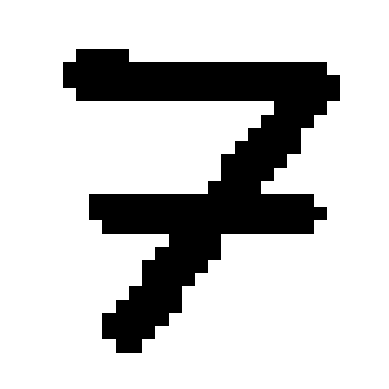

In [186]:
def load_and_preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(28, 28), color_mode='grayscale')
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = img / 255.0
    return img

# Predict the digit in the image
def predict_image(image_path):
    img = load_and_preprocess_image(image_path)
    predictions = model.predict(img)
    predicted_digit = np.argmax(predictions)
    return predicted_digit

image_path = 'Seven.png'
predicted_digit = predict_image(image_path)
print(f'The predicted digit is: {predicted_digit}')

def display_image(image_path):
    img = image.load_img(image_path, target_size=(28, 28), color_mode='grayscale')
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.show()

display_image(image_path)